In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving 0801_X_imputed.csv to 0801_X_imputed.csv
Saving opt-target.csv to opt-target.csv
Saving real-target.csv to real-target.csv
Saving survival.csv to survival.csv


In [4]:
import io
feature = pd.read_csv(io.BytesIO(uploaded['0801_X_imputed.csv'])) 
optimal_gastro = pd.read_csv(io.BytesIO(uploaded['opt-target.csv'])) 
real_gastro = pd.read_csv(io.BytesIO(uploaded['real-target.csv'])) 

In [5]:
optimal_gastro.drop(columns='Unnamed: 0', inplace=True)
real_gastro.drop(columns='Unnamed: 0', inplace=True)
feature.drop(columns='Unnamed: 0', inplace=True)

In [23]:
print("There are",len(feature),"patients with feature")
print("There are",len(optimal_gastro),"patients with optimal value")
print("There are",len(real_gastro),"patients with real value")
feature_real = feature.merge(real_gastro, on='SubjectID', how='inner')
print("There are",len(feature_real),"patients with feature & real value 1:",len(feature_real[feature_real['status_real']==1]),"0:", len(feature_real[feature_real['status_real']==0]))

There are 4088 patients with feature
There are 5670 patients with optimal value
There are 5027 patients with real value
There are 2941 patients with feature & real value 1: 475 0: 2466


In [11]:
feature2 = feature.merge(optimal_gastro, on='SubjectID', how='inner')
feature2 = feature2.merge(real_gastro, on='SubjectID', how='inner')
feature2

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope,time_opt,status_opt,time_real,status_real
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,58.933333,-1.227778,0.057181,4.0,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.0,1.200000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.013889,0.000000,-0.088889,274,0,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.078906,120.877939,53.040000,0.000000,-0.009689,4.0,4.000000,4.000000,3.500000,2.00,2.250000,3.500000,2.0,1.000000,4.000000,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,-0.016393,0.000000,0.000000,0.000000,0.060656,401,0,401,0
2,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,88.400000,0.000000,-0.015037,3.0,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.0,2.833333,2.833333,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.108791,35,1,231,0
3,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,66.300000,0.260000,0.000000,4.0,4.000000,4.000000,3.000000,3.00,2.000000,3.000000,3.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,401,0,401,0
4,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,60.101027,-0.152607,0.000000,4.0,4.000000,4.000000,4.000000,4.00,2.000000,3.000000,1.0,0.000000,4.000000,-0.012761,0.015419,-0.009460,0.004913,0.010279,0.005464,-0.011111,0.003916,-0.002465,0.001007,-0.041071,378,0,378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,998506.0,62.0,1.0,-310.0,-341.0,0.0,31.0,0.107748,125.750000,88.400000,0.000000,-0.028239,4.0,4.000000,4.000000,3.000000,3.00,2.300000,3.600000,4.0,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014286,-0.014286,0.000000,0.000000,0.000000,-0.051429,266,0,266,0
2607,998519.0,42.0,0.0,-475.0,-653.0,0.0,178.0,-0.015745,67.000000,0.000000,0.000000,-0.067288,4.0,4.000000,4.000000,2.500000,2.75,2.375000,2.125000,1.0,0.000000,4.000000,0.000000,0.000000,0.000000,-0.022989,-0.011494,-0.011494,-0.022989,0.000000,0.000000,0.000000,-0.037931,280,0,280,0
2608,999166.0,60.0,1.0,-49.0,-999.0,1.0,950.0,-0.333333,75.000000,83.980000,0.192174,0.015224,3.0,3.000000,4.000000,4.000000,4.00,4.000000,3.000000,3.0,3.000000,4.000000,-0.011793,-0.017459,-0.013508,0.023029,0.010640,0.016401,0.016562,0.003904,-0.021921,0.011504,-0.008073,390,0,390,0
2609,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,88.400000,0.000000,0.011583,4.0,4.000000,4.000000,2.000000,1.00,0.400000,2.800000,2.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,-0.007143,266,0,266,0


In [12]:
print("There are",len(feature2[(feature2['status_opt']==1) & (feature2['status_real']==1)]), "values of (opt,real) = (1,1)")
print("There are",len(feature2[(feature2['status_opt']==1) & (feature2['status_real']==0)]), "values of (opt,real) = (1,0)")
print("There are",len(feature2[(feature2['status_opt']==0) & (feature2['status_real']==1)]), "values of (opt,real) = (0,1)")
print("There are",len(feature2[(feature2['status_opt']==0) & (feature2['status_real']==0)]), "values of (opt,real) = (0,0)")

There are 309 values of (opt,real) = (1,1)
There are 506 values of (opt,real) = (1,0)
There are 27 values of (opt,real) = (0,1)
There are 1769 values of (opt,real) = (0,0)


In [13]:
feature2['real_minus_optimal_gas_time'] = feature2['time_real']-feature2['time_opt']
feature1 = feature2.copy()
feature1 = feature1[(feature1['status_opt']== 1) & (feature1['status_real']== 1) ]
feature1.describe()

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope,time_opt,status_opt,time_real,status_real,real_minus_optimal_gas_time
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.0,309.000000,309.0,309.000000
mean,478055.660194,57.375405,0.556634,-215.922330,-497.268608,0.365696,281.346278,-0.141414,76.375153,72.746323,-0.013842,-0.028658,2.703479,3.097600,3.235922,2.899137,2.544175,2.428101,2.923193,2.641963,1.930043,3.516586,-0.003593,-0.003557,-0.002715,-0.002601,-0.002053,-0.003799,-0.001682,-0.003053,-0.003967,-0.001055,-0.019277,186.650485,1.0,260.475728,1.0,73.825243
std,301074.423747,11.033664,0.497588,202.781503,339.573265,0.482406,239.411589,0.345439,16.446402,18.382921,0.279043,0.112617,0.892784,0.813072,0.483560,1.159137,1.300910,1.200597,1.093309,0.997058,1.418661,0.539500,0.008779,0.013670,0.012081,0.018654,0.021357,0.021502,0.016565,0.010553,0.013556,0.012212,0.049969,105.602727,0.0,94.719975,0.0,89.088504
min,6786.000000,24.000000,0.000000,-1566.000000,-4274.000000,0.000000,-199.000000,-1.500000,31.500000,30.940000,-1.245070,-0.250000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,-0.036145,-0.045455,-0.030769,-0.043956,-0.042254,-0.066912,-0.037583,-0.055556,-0.042254,-0.049180,-0.204082,7.000000,1.0,94.000000,1.0,-182.000000
25%,217424.000000,50.000000,0.000000,-297.000000,-599.000000,0.000000,141.000000,-0.321773,66.944498,58.993043,-0.130000,-0.069067,2.000000,2.666667,3.000000,2.500000,1.500000,1.666667,2.000000,2.000000,0.750000,3.000000,-0.011905,-0.011765,-0.011236,-0.010989,-0.012048,-0.013158,-0.010037,-0.007545,-0.011765,-0.001962,-0.048103,99.000000,1.0,182.000000,1.0,0.000000
50%,453945.000000,59.000000,1.000000,-160.000000,-440.000000,0.000000,229.000000,-0.140648,75.500000,70.720000,0.000000,-0.032714,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,2.500000,1.750000,3.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016216,175.000000,1.0,266.000000,1.0,56.000000
75%,743665.000000,66.000000,1.000000,-82.000000,-295.000000,1.000000,364.000000,0.019431,87.000000,87.823449,0.088687,0.000000,3.000000,4.000000,3.666667,4.000000,4.000000,3.500000,4.000000,3.500000,3.200000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006389,266.000000,1.0,328.000000,1.0,127.000000
max,996711.000000,82.000000,1.000000,-1.000000,-84.000000,1.000000,2708.000000,1.375000,121.666667,147.333333,1.052381,1.666667,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.037183,0.120097,0.139875,0.253854,0.302263,0.297838,0.227315,0.099991,0.141617,0.061175,0.135946,476.000000,1.0,530.000000,1.0,397.000000


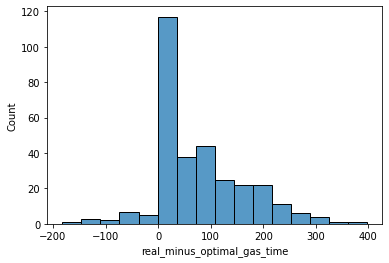

In [14]:
sns.histplot(x=feature1['real_minus_optimal_gas_time'])

In [15]:
print("There are",len(feature1[feature1['real_minus_optimal_gas_time'] < 0]), "values of delayed < 0")
print("There are",len(feature1[feature1['real_minus_optimal_gas_time'] == 0]), "values of delayed = 0")
print("There are",len(feature1[feature1['real_minus_optimal_gas_time'] > 0]), "values of delayed > 0")

There are 18 values of delayed < 0
There are 88 values of delayed = 0
There are 203 values of delayed > 0


In [16]:
feature1.columns

Index(['SubjectID', 'Age', 'Gender', 'diag_delta', 'onset_delta', 'onset_site',
       'diag_minus_onset', 'fvc_slope', 'fvc_mean', 'Creatinine_mean',
       'Creatinine_slope', 'alsfrs_total_slope', 'mean_Q1_Speech',
       'mean_Q2_Salivation', 'mean_Q3_Swallowing', 'mean_Q4_Handwriting',
       'mean_Q5_Cutting', 'mean_Q6_Dressing_and_Hygiene',
       'mean_Q7_Turning_in_Bed', 'mean_Q8_Walking', 'mean_Q9_Climbing_Stairs',
       'mean_Q10_Respiratory', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory',
       'weight_slope', 'time_opt', 'status_opt', 'time_real', 'status_real',
       'real_minus_optimal_gas_time'],
      dtype='object')

##PC

In [17]:
feature_pc = feature1.drop(columns=["status_opt", "status_real", "SubjectID" ])

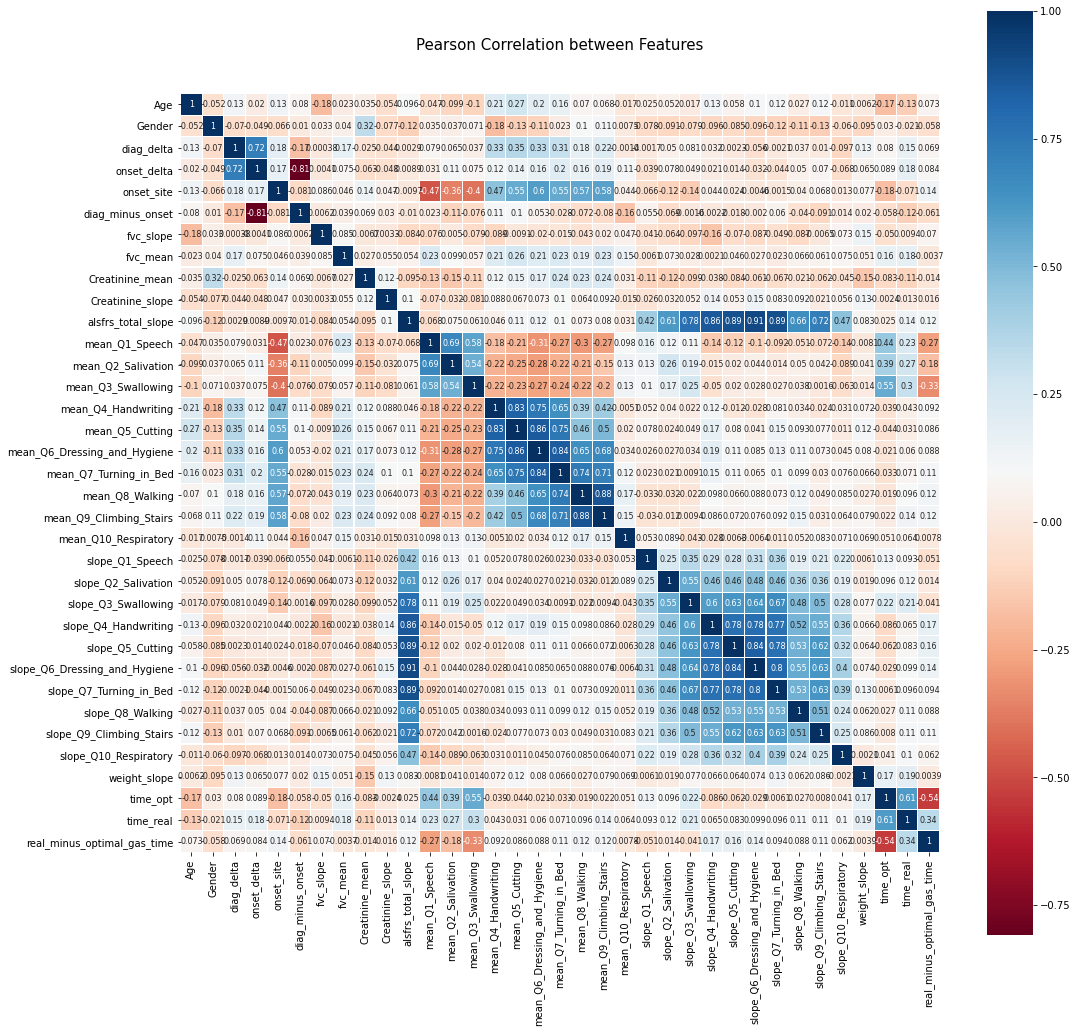

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(17, 17))
plt.title('Pearson Correlation between Features', y=1.05, size=15)
sns.heatmap(feature_pc.astype(float).corr(), linewidths=0.1, vmax=1.0,
	square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":8})

## Regression

In [27]:
X_train = feature1[['Age', 'Gender', 'diag_delta', 'onset_delta', 'onset_site',
       'diag_minus_onset', 'fvc_slope', 'fvc_mean', 'Creatinine_mean',
       'Creatinine_slope', 'alsfrs_total_slope', 'mean_Q1_Speech',
       'mean_Q2_Salivation', 'mean_Q3_Swallowing', 'mean_Q4_Handwriting',
       'mean_Q5_Cutting', 'mean_Q6_Dressing_and_Hygiene',
       'mean_Q7_Turning_in_Bed', 'mean_Q8_Walking', 'mean_Q9_Climbing_Stairs',
       'mean_Q10_Respiratory', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory',
       'weight_slope']]
y_train = feature1[['real_minus_optimal_gas_time']]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, index=X_train.index, columns=X_train.columns)

In [32]:
import statsmodels.api as sm
x_train1 = sm.add_constant(X_train,has_constant="add")

model = sm.OLS(y_train,x_train1)
fitted_model_lr2 = model.fit()

fitted_model_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     real_minus_optimal_gas_time   R-squared:                       0.207
Model:                                     OLS   Adj. R-squared:                  0.118
Method:                          Least Squares   F-statistic:                     2.327
Date:                         Sat, 07 Aug 2021   Prob (F-statistic):           0.000167
Time:                                 09:49:45   Log-Likelihood:                -1789.5
No. Observations:                          309   AIC:                             3643.
Df Residuals:                              277   BIC:                             3762.
Df Model:                                   31                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            73.8252      4.760     15.509      0.000      64.455      83.196
Age                               3.2022      5.229      0.612      0.541      -7.091      13.495
Gender                           -3.5621      5.491     -0.649      0.517     -14.372       7.248
diag_delta                        6.4040      4.889      1.310      0.191      -3.220      16.027
onset_delta                       4.1054      2.381      1.724      0.086      -0.582       8.792
onset_site                       -9.9126      7.327     -1.353      0.177     -24.337       4.512
diag_minus_onset                 -0.3988      4.326     -0.092      0.927      -8.914       8.116
fvc_slope                         7.9204      5.282      1.500      0.135      -2.477      18.318
fvc_mean                         -0.2944      5.528     -0.053      0.958     -11.176      10.587
Creatinine_mean                  -3.7200      5.485     -0.678      0.498     -14.517       7.077
Creatinine_slope                 -3.2547      5.122     -0.635      0.526     -13.338       6.828
alsfrs_total_slope               62.3944     63.983      0.975      0.330     -63.560     188.349
mean_Q1_Speech                  -12.0634      8.129     -1.484      0.139     -28.066       3.939
mean_Q2_Salivation                1.7464      7.303      0.239      0.811     -12.630      16.123
mean_Q3_Swallowing              -23.8991      6.462     -3.698      0.000     -36.620     -11.178
mean_Q4_Handwriting              12.6359      9.278      1.362      0.174      -5.629      30.901
mean_Q5_Cutting                   1.6582     12.355      0.134      0.893     -22.663      25.979
mean_Q6_Dressing_and_Hygiene    -25.3017     12.904     -1.961      0.051     -50.705       0.102
mean_Q7_Turning_in_Bed            3.9284     11.092      0.354      0.723     -17.906      25.763
mean_Q8_Walking                   4.1185     11.682      0.353      0.725     -18.879      27.116
mean_Q9_Climbing_Stairs           9.9014     11.300      0.876      0.382     -12.343      32.146
mean_Q10_Respiratory              2.8397      5.215      0.545      0.586      -7.426      13.105
slope_Q1_Speech                  -8.2893      7.220     -1.148      0.252     -22.503       5.925
slope_Q2_Salivation              -7.7683      9.697     -0.801      0.424     -26.857      11.320
slope_Q3_Swallowing             -19.5832     10.962     -1.787      0.075     -41.162       1.995
slope_Q4_Handwriting              3.2590     13.893      0.235      0.815     -24.090      30.608
slope_Q5_Cutting                  1.8277     15.545      0.118      0.906     -28.773      32.429
slope_Q6_Dressing_and_Hygiene    -3.9385    

[09:52:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


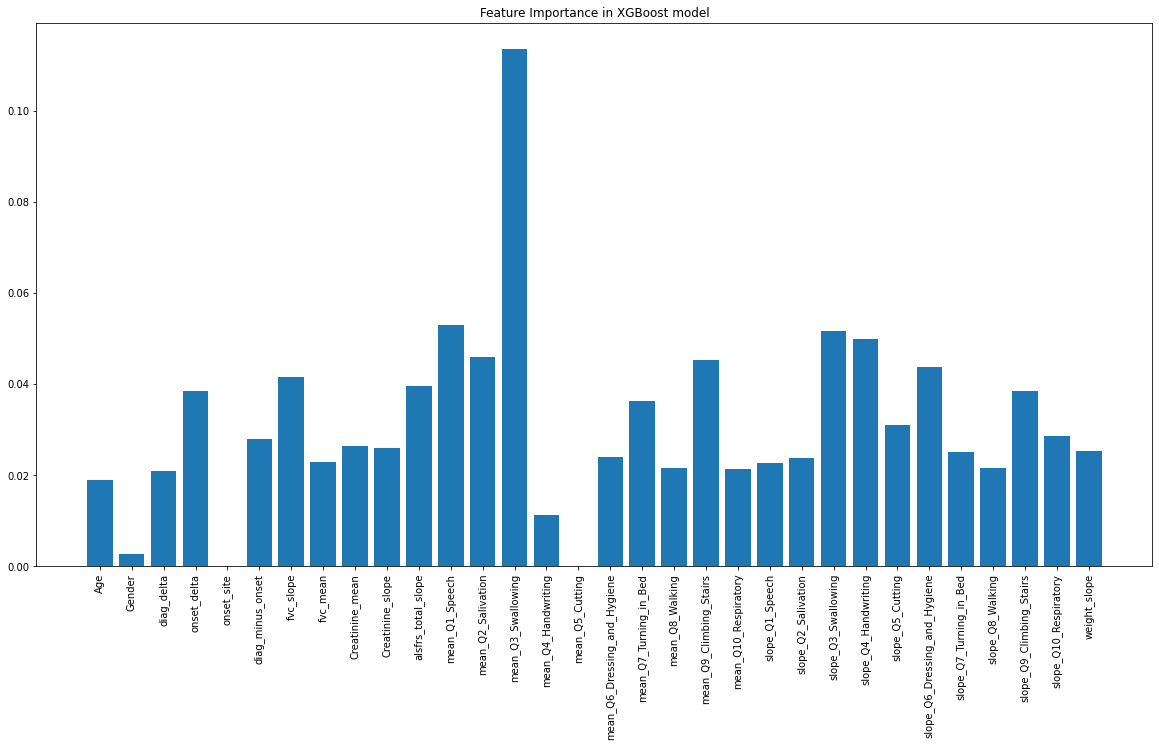

In [33]:
from xgboost import XGBRegressor

# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

fig = plt.figure(figsize=(20,10))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in XGBoost model')
plt.show()

##Delayed - categorical cox

###data distribution

In [35]:
feature1['real_minus_optimal_gas_time'].quantile(0.67)

93.36000000000001

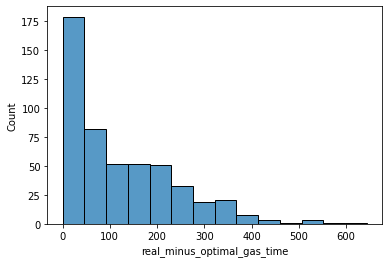

In [36]:
sns.histplot(x=feature2[(feature2['status_opt']==1) & (feature2['status_real']==0)]['real_minus_optimal_gas_time'])

In [42]:
feature2[(feature2['status_opt']==1) & (feature2['status_real']==0)]['real_minus_optimal_gas_time'].value_counts()

0      128
56      10
112      8
91       8
63       7
      ... 
212      1
206      1
200      1
195      1
167      1
Name: real_minus_optimal_gas_time, Length: 200, dtype: int64

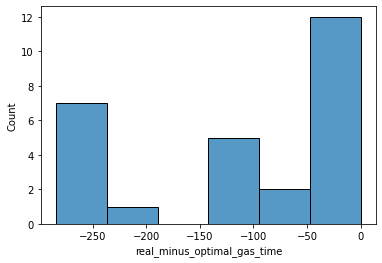

In [43]:
sns.histplot(x=feature2[(feature2['status_opt']==0) & (feature2['status_real']==1)]['real_minus_optimal_gas_time'])

In [44]:
feature2[(feature2['status_opt']==0) & (feature2['status_real']==1)]['real_minus_optimal_gas_time'].value_counts()

 0      8
-126    2
-273    2
-98     1
-238    1
-112    1
-24     1
-240    1
-28     1
-14     1
-284    1
-56     1
-217    1
-122    1
-91     1
-252    1
-29     1
-275    1
Name: real_minus_optimal_gas_time, dtype: int64

In [ ]:
feature2[(feature2['status_opt']==1) & (feature2['status_real']==1)]

In [45]:
import io
surv = pd.read_csv(io.BytesIO(uploaded['survival.csv'])) 

In [47]:
feature_surv = pd.merge(feature2, surv, on = 'SubjectID')
feature_surv 

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope,time_opt,status_opt,time_real,status_real,real_minus_optimal_gas_time,time_event,status
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,58.933333,-1.227778,0.057181,4.0,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.0,1.200000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.013889,0.000000,-0.088889,274,0,274,0,0,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.078906,120.877939,53.040000,0.000000,-0.009689,4.0,4.000000,4.000000,3.500000,2.00,2.250000,3.500000,2.0,1.000000,4.000000,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,-0.016393,0.000000,0.000000,0.000000,0.060656,401,0,401,0,0,401,0
2,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,88.400000,0.000000,-0.015037,3.0,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.0,2.833333,2.833333,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.108791,35,1,231,0,196,250,1
3,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,66.300000,0.260000,0.000000,4.0,4.000000,4.000000,3.000000,3.00,2.000000,3.000000,3.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,401,0,401,0,0,401,0
4,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,60.101027,-0.152607,0.000000,4.0,4.000000,4.000000,4.000000,4.00,2.000000,3.000000,1.0,0.000000,4.000000,-0.012761,0.015419,-0.009460,0.004913,0.010279,0.005464,-0.011111,0.003916,-0.002465,0.001007,-0.041071,378,0,378,0,0,378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,998506.0,62.0,1.0,-310.0,-341.0,0.0,31.0,0.107748,125.750000,88.400000,0.000000,-0.028239,4.0,4.000000,4.000000,3.000000,3.00,2.300000,3.600000,4.0,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014286,-0.014286,0.000000,0.000000,0.000000,-0.051429,266,0,266,0,0,266,0
2606,998519.0,42.0,0.0,-475.0,-653.0,0.0,178.0,-0.015745,67.000000,0.000000,0.000000,-0.067288,4.0,4.000000,4.000000,2.500000,2.75,2.375000,2.125000,1.0,0.000000,4.000000,0.000000,0.000000,0.000000,-0.022989,-0.011494,-0.011494,-0.022989,0.000000,0.000000,0.000000,-0.037931,280,0,280,0,0,280,0
2607,999166.0,60.0,1.0,-49.0,-999.0,1.0,950.0,-0.333333,75.000000,83.980000,0.192174,0.015224,3.0,3.000000,4.000000,4.000000,4.00,4.000000,3.000000,3.0,3.000000,4.000000,-0.011793,-0.017459,-0.013508,0.023029,0.010640,0.016401,0.016562,0.003904,-0.021921,0.011504,-0.008073,390,0,390,0,0,390,0
2608,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,88.400000,0.000000,0.011583,4.0,4.000000,4.000000,2.000000,1.00,0.400000,2.800000,2.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,-0.007143,266,0,266,0,0,266,0


In [48]:
early_list =  list(feature1[feature1['real_minus_optimal_gas_time']<= 0]['SubjectID'])
medium_list =  list(feature1[(feature1['real_minus_optimal_gas_time']> 0) & (feature1['real_minus_optimal_gas_time'] <= 93.36)]['SubjectID'])
late_list =  list(feature1[feature1['real_minus_optimal_gas_time'] > 93.36]['SubjectID'])

add_early_list = list(feature2[(feature2['status_opt']==0) & (feature2['status_real']==1)]['SubjectID'])
add_late_list = list(feature2[(feature2['status_opt']==1) & (feature2['status_real']==0) & (feature2['real_minus_optimal_gas_time'] > 93.36)]['SubjectID'])

print('early list:', len(early_list))
print('medium list:', len(medium_list))
print('late list:', len(late_list))
print('add_early list:', len(add_early_list))
print('add_late list:', len(add_late_list))

feature_surv_early = feature_surv.copy()
feature_surv_early.query("SubjectID == {0}".format(early_list + add_early_list), inplace=True)
feature_surv_early['delayed_gas'] = 0 

feature_surv_medium = feature_surv.copy()
feature_surv_medium.query("SubjectID == {0}".format(medium_list), inplace=True)
feature_surv_medium['delayed_gas'] = 1

feature_surv_late = feature_surv.copy()
feature_surv_late.query("SubjectID == {0}".format(late_list + add_late_list), inplace=True)
feature_surv_late['delayed_gas'] = 2

X = pd.concat([feature_surv_early, feature_surv_medium, feature_surv_late])

early list: 106
medium list: 101
late list: 102
add_early list: 27
add_late list: 241


In [50]:
X['mean_Q1_2_3_mouth'] = X['mean_Q1_Speech'] + X['mean_Q2_Salivation'] + X['mean_Q3_Swallowing']

X = X[['Age', 'onset_delta', 'onset_site', 'fvc_mean', 'Creatinine_slope', 
                     'alsfrs_total_slope',  'mean_Q1_2_3_mouth',   'mean_Q5_Cutting', 'mean_Q7_Turning_in_Bed', 
                       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 
                      'weight_slope','delayed_gas', 'time_event','status']]

In [52]:
pip install lifelines

     |████████████████████████████████| 348 kB 14.3 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=30bf718ad89e028fe80c013db59b3bf36275023e4c6286531b2af4a25d4292b2
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [53]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph.fit(X, 'time_event', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 577 total observations, 396 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 577
number of events observed = 181
   partial log-likelihood = -911.27
         time fit was run = 2021-08-07 11:53:48 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
Age                      0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
onset_delta              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
onset_site              -0.45       0.64       0.23            -0.90            -0.00                 0.41                 1.00
fvc_mean                -0.03       0.97       0.00            -0.04            -0.02                 0.96                 0.98
Creatinine_slope        -0.03       0.97       0.28            -0.58             0.51                 0.56                 1.66
alsfrs_total_slope      -3.39       0.03       1.72            -6.76            -0.01                 0.00                 0.99
mean_Q1_2_3_mouth       -0.05       0.95       0.05            -0.15             0.05                 0.86                 1.06
mean_Q5_Cutting          0.09       1.09       0.09            -0.08             0.25                 0.92                 1.29
mean_Q7_Turning_in_Bed  -0.12       0.88       0.10            -0.31             0.07                 0.73                 1.07
slope_Q3_Swallowing      2.41      11.08       8.78           -14.80            19.61                 0.00             3.29e+08
slope_Q4_Handwriting     3.62      37.50       6.59            -9.29            16.54                 0.00             1.52e+07
weight_slope            -7.25       0.00       1.60           -10.38            -4.12                 0.00                 0.02
delayed_gas             -0.41       0.66       0.09            -0.58            -0.24                 0.56                 0.79

                           z      p   -log2(p)
covariate                                     
Age                     5.09 <0.005      21.43
onset_delta             0.97   0.33       1.59
onset_site             -1.98   0.05       4.38
fvc_mean               -5.34 <0.005      23.40
Creatinine_slope       -0.12   0.90       0.15
alsfrs_total_slope     -1.97   0.05       4.35
mean_Q1_2_3_mouth      -0.91   0.36       1.47
mean_Q5_Cutting         1.02   0.31       1.71
mean_Q7_Turning_in_Bed -1.27   0.20       2.30
slope_Q3_Swallowing     0.27   0.78       0.35
slope_Q4_Handwriting    0.55   0.58       0.78
weight_slope           -4.54 <0.005      17.45
delayed_gas            -4.69 <0.005      18.45
---
Concordance = 0.75
Partial AIC = 1848.54
log-likelihood ratio test = 122.18 on 13 df
-log2(p) of ll-ratio test = 63.54

##Feature Independency check

In [62]:
feature2[feature2['time_opt']==0]

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope,time_opt,status_opt,time_real,status_real,real_minus_optimal_gas_time


Text(0.5, 0.98, 'data distribution')

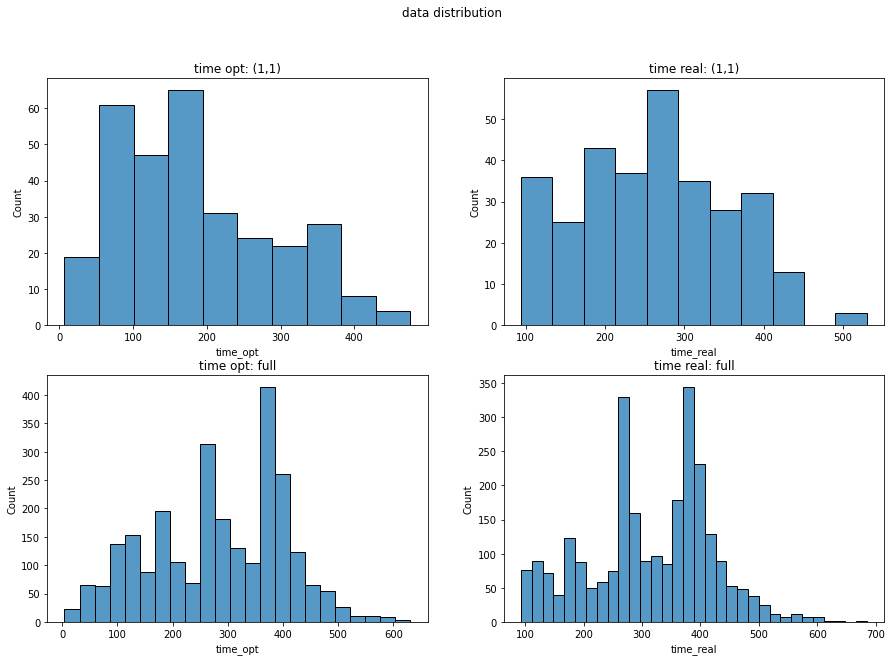

In [59]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.histplot(x=feature1['time_opt'])
plt.title('time opt: (1,1)')

plt.subplot(222)
sns.histplot(x=feature1['time_real'])
plt.title('time real: (1,1)')

plt.subplot(223)
sns.histplot(x=feature2['time_opt'])
plt.title('time opt: full')

plt.subplot(224)
sns.histplot(x=feature2['time_real'])
plt.title('time real: full')

plt.suptitle('data distribution')

##With predicted optimal

In [68]:
X_full = pd.merge(feature, optimal_gastro, on = 'SubjectID')
X_full = X_full[X_full['time_opt']!=0]


In [69]:
df_train = X_full.copy()
df_train['mean_Q1_2_3_mouth'] = df_train['mean_Q1_Speech'] + df_train['mean_Q2_Salivation'] + df_train['mean_Q3_Swallowing']
df_train = df_train[['Age', 'onset_delta', 'onset_site', 'fvc_mean', 'Creatinine_slope', 
                     'alsfrs_total_slope',  'mean_Q1_2_3_mouth',   'mean_Q5_Cutting', 'mean_Q7_Turning_in_Bed', 
                       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 
                      'weight_slope', 'time_opt', 'status_opt']]

In [70]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train, 'time_opt', event_col='status_opt')

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['slope_Q3_Swallowing'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 3324 total observations, 2198 right-censored observations>

In [71]:
cph_median = pd.concat([X_full['SubjectID'],cph.predict_median(df_train)], axis=1)
cph_median

,SubjectID,0.5
0,329.0,1295.0
1,348.0,1188.0
2,708.0,288.0
3,902.0,699.0
5,1736.0,172.0
...,...,...
3443,998756.0,231.0
3444,999166.0,389.0
3445,999823.0,308.0
3446,999880.0,inf


In [72]:
print('There are ' + str(cph_median.replace([np.inf,-np.inf], np.nan).isnull().sum(axis = 0).iloc[1]) + ' inf values in cph_median')

There are 187 inf values in cph_median


In [74]:
cph_median.columns = ['SubjectID', 'predicted_opt']
cph_median = cph_median[cph_median['predicted_opt']!=np.inf]
cph_median

,SubjectID,predicted_opt
0,329.0,1295.0
1,348.0,1188.0
2,708.0,288.0
3,902.0,699.0
5,1736.0,172.0
...,...,...
3442,998542.0,279.0
3443,998756.0,231.0
3444,999166.0,389.0
3445,999823.0,308.0


In [76]:
feature_real = feature.merge(real_gastro, on='SubjectID', how='inner')
feature_real = feature_real.merge(cph_median, on='SubjectID', how='inner')
feature_real['real_minus_optimal_gas_time'] = feature_real['time_real']-feature_real['predicted_opt']

In [79]:
feature_real_surv = pd.merge(feature_real, surv, on = 'SubjectID')
feature_real_surv

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,Creatinine_mean,Creatinine_slope,alsfrs_total_slope,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,weight_slope,time_real,status_real,predicted_opt,real_minus_optimal_gas_time,time_event,status
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,58.933333,-1.227778,0.057181,4.0,3.000000,4.000000,3.000000,1.90,3.000000,2.600000,2.0,1.200000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.013889,0.000000,-0.088889,274,0,1295.0,-1021.0,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.078906,120.877939,53.040000,0.000000,-0.009689,4.0,4.000000,4.000000,3.500000,2.00,2.250000,3.500000,2.0,1.000000,4.000000,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,-0.016393,0.000000,0.000000,0.000000,0.060656,401,0,1188.0,-787.0,401,0
2,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,88.400000,0.000000,-0.015037,3.0,2.833333,2.666667,3.166667,3.75,3.166667,4.000000,4.0,2.833333,2.833333,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.108791,231,0,288.0,-57.0,250,1
3,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,66.300000,0.260000,0.000000,4.0,4.000000,4.000000,3.000000,3.00,2.000000,3.000000,3.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,401,0,903.0,-502.0,401,0
4,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,60.101027,-0.152607,0.000000,4.0,4.000000,4.000000,4.000000,4.00,2.000000,3.000000,1.0,0.000000,4.000000,-0.012761,0.015419,-0.009460,0.004913,0.010279,0.005464,-0.011111,0.003916,-0.002465,0.001007,-0.041071,378,0,867.0,-489.0,378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,997276.0,32.0,1.0,-305.0,-699.0,1.0,394.0,-0.154964,51.000000,88.400000,0.000000,-0.010797,2.0,3.000000,4.000000,3.400000,3.50,3.700000,4.000000,4.0,4.000000,3.700000,0.000000,0.000000,0.000000,-0.042857,0.014286,0.014286,0.000000,0.000000,0.000000,0.014286,-0.097143,273,0,428.0,-155.0,273,0
2447,998506.0,62.0,1.0,-310.0,-341.0,0.0,31.0,0.107748,125.750000,88.400000,0.000000,-0.028239,4.0,4.000000,4.000000,3.000000,3.00,2.300000,3.600000,4.0,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014286,-0.014286,0.000000,0.000000,0.000000,-0.051429,266,0,867.0,-601.0,266,0
2448,998519.0,42.0,0.0,-475.0,-653.0,0.0,178.0,-0.015745,67.000000,0.000000,0.000000,-0.067288,4.0,4.000000,4.000000,2.500000,2.75,2.375000,2.125000,1.0,0.000000,4.000000,0.000000,0.000000,0.000000,-0.022989,-0.011494,-0.011494,-0.022989,0.000000,0.000000,0.000000,-0.037931,280,0,884.0,-604.0,280,0
2449,999166.0,60.0,1.0,-49.0,-999.0,1.0,950.0,-0.333333,75.000000,83.980000,0.192174,0.015224,3.0,3.000000,4.000000,4.000000,4.00,4.000000,3.000000,3.0,3.000000,4.000000,-0.011793,-0.017459,-0.013508,0.023029,0.010640,0.016401,0.016562,0.003904,-0.021921,0.011504,-0.008073,390,0,389.0,1.0,390,0


In [80]:
df_train2 = feature_real_surv.copy()
df_train2['mean_Q1_2_3_mouth'] = df_train2['mean_Q1_Speech'] + df_train2['mean_Q2_Salivation'] + df_train2['mean_Q3_Swallowing']
df_train2 = df_train2[['Age', 'onset_delta', 'onset_site', 'fvc_mean', 'Creatinine_slope', 
                     'alsfrs_total_slope',  'mean_Q1_2_3_mouth',   'mean_Q5_Cutting', 'mean_Q7_Turning_in_Bed', 
                       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 
                      'weight_slope', 'real_minus_optimal_gas_time', 'time_event', 'status']]

In [81]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train2, 'time_event', event_col='status')
cph.print_summary()

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['slope_Q3_Swallowing'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 2451 total observations, 1982 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 2451
number of events observed = 469
   partial log-likelihood = -2964.49
         time fit was run = 2021-08-07 13:10:21 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
Age                           0.05       1.05       0.00             0.04             0.05                 1.04                 1.06
onset_delta                   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
onset_site                   -0.21       0.81       0.17            -0.55             0.13                 0.58                 1.13
fvc_mean                     -0.03       0.97       0.00            -0.03            -0.02                 0.97                 0.98
Creatinine_slope             -0.12       0.88       0.16            -0.43             0.18                 0.65                 1.20
alsfrs_total_slope           -3.91       0.02       0.98            -5.84            -1.98                 0.00                 0.14
mean_Q1_2_3_mouth            -0.25       0.78       0.04            -0.32            -0.17                 0.73                 0.84
mean_Q5_Cutting              -0.02       0.98       0.05            -0.12             0.08                 0.89                 1.08
mean_Q7_Turning_in_Bed       -0.46       0.63       0.06            -0.58            -0.34                 0.56                 0.71
slope_Q3_Swallowing           0.08       1.09       6.27           -12.21            12.38                 0.00             2.37e+05
slope_Q4_Handwriting          9.67   15878.23       4.60             0.65            18.70                 1.92             1.32e+08
weight_slope                 -6.99       0.00       0.85            -8.65            -5.33                 0.00                 0.00
real_minus_optimal_gas_time  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                                z      p   -log2(p)
covariate                                          
Age                         10.15 <0.005      78.00
onset_delta                  7.49 <0.005      43.71
onset_site                  -1.23   0.22       2.19
fvc_mean                    -9.49 <0.005      68.61
Creatinine_slope            -0.80   0.43       1.23
alsfrs_total_slope          -3.97 <0.005      13.79
mean_Q1_2_3_mouth           -6.76 <0.005      36.03
mean_Q5_Cutting             -0.41   0.68       0.56
mean_Q7_Turning_in_Bed      -7.69 <0.005      45.98
slope_Q3_Swallowing          0.01   0.99       0.02
slope_Q4_Handwriting         2.10   0.04       4.81
weight_slope                -8.26 <0.005      52.57
real_minus_optimal_gas_time -8.39 <0.005      54.20
---
Concordance = 0.81
Partial AIC = 5954.98
log-likelihood ratio test = 418.49 on 13 df
-log2(p) of ll-ratio test = 267.61